# Steel Plates Faults

## Modeling

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
df = pd.read_csv('Faults.csv', index_col=0)
df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,class
0,42,50,270900,270944,267,17,44,24220,76,108,...,-0.2913,0.5822,1,0,0,0,0,0,0,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,-0.1756,0.2984,1,0,0,0,0,0,0,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,-0.1228,0.2150,1,0,0,0,0,0,0,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,-0.1568,0.5212,1,0,0,0,0,0,0,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,-0.1992,1.0000,1,0,0,0,0,0,0,Pastry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.0026,0.7254,0,0,0,0,0,0,1,Other_Faults
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.0582,0.8173,0,0,0,0,0,0,1,Other_Faults
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.0052,0.7079,0,0,0,0,0,0,1,Other_Faults
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0171,0.9919,0,0,0,0,0,0,1,Other_Faults


In [4]:
df.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults', 'class'],
      dtype='object')

In [5]:
x = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]
y = df['K_Scatch']

In [6]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

**Z-Score**
$\text{표준편차를 단위로 봤을 때 측정치가 평균에서 얼마만큼 일탈하였는가를 확인} \\
\text{각 데이터의 단위가 다르더라도 동일선상에서 얼마만큼 평균에서 떨어져있는지를 같은 Z-score 기준으로 확인가능}\\
\rightarrow z = \cfrac{\text{score}-\text{mean}}{\text{standard deviation}} = \cfrac{x-\text{mean}}{\text{standard deviation}}$

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y) 
#stratify=y: y값의 비율을 유지한체 split

In [8]:
x_train = x_train.apply(zscore)
x_test = x_test.apply(zscore)

In [9]:
x_train.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,...,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03
mean,-1.075886e-16,-2.632488e-17,-4.578239e-17,-2.174664e-17,6.867359e-18,-2.289120e-17,-2.289120e-18,-2.289120e-18,2.266228e-16,-6.764349e-16,...,-4.177643e-17,8.469743e-17,-1.682503e-16,1.831296e-17,2.666824e-16,6.352307e-17,6.867359e-18,3.891503e-17,4.349327e-17,1.133114e-16
std,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,...,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00
min,-1.103367e+00,-1.241076e+00,-9.104613e-01,-9.104788e-01,-3.483794e-01,-3.406371e-01,-1.767603e-01,-3.893515e-01,-2.643140e+00,-5.071400e+00,...,-5.289097e-01,-2.468152e+00,-3.280170e+00,-1.185811e+00,-2.774003e+00,-2.156377e+00,-3.067242e+00,-2.143465e+00,-5.839974e+00,-1.367353e+00
25%,-9.883000e-01,-8.621817e-01,-6.562362e-01,-6.562372e-01,-3.333730e-01,-3.004833e-01,-1.514077e-01,-3.719521e-01,-6.554519e-01,-3.480654e-01,...,-4.443167e-01,-7.982123e-01,-9.250766e-01,-1.185811e+00,-7.146692e-01,-6.985005e-01,-6.999318e-01,-8.252854e-01,-4.361607e-01,-9.978418e-01
50%,-2.637179e-01,-2.988794e-01,-2.545875e-01,-2.546108e-01,-3.171771e-01,-2.665069e-01,-1.260551e-01,-3.538504e-01,1.675751e-01,-1.851918e-01,...,-3.870920e-01,1.006070e-01,5.824951e-01,8.913658e-01,-3.182921e-01,-3.312158e-01,-1.668921e-01,2.490715e-02,-1.325061e-02,-2.443915e-01
75%,9.307593e-01,9.199295e-01,2.919470e-01,2.919292e-01,-2.027537e-01,-8.967550e-02,-1.144025e-02,-2.343737e-01,6.567327e-01,5.205939e-01,...,-1.623398e-01,7.575785e-01,7.858832e-01,8.913658e-01,5.254920e-01,3.829141e-01,7.329140e-01,8.448359e-01,4.324923e-01,1.226000e+00
max,2.180122e+00,2.203231e+00,6.155444e+00,6.155404e+00,2.758779e+01,3.192762e+01,3.817116e+01,2.140560e+01,3.661558e+00,6.601209e+00,...,1.397465e+01,1.578793e+00,7.858832e-01,8.913658e-01,3.420237e+00,3.627366e+00,6.274553e+00,1.830314e+00,5.180199e+00,1.226589e+00


## Grid Search
### LogisticRegression

In [10]:
from sklearn.model_selection import GridSearchCV #각 모델의 파라미터를 최적화하는데 사용
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from colorama import Fore

### Subset Selection
[Reference](https://direction-f.tistory.com/75)
$\text{- 사용 가능한 Dependent Variable들이 많으나 어떤 것이 유의미한 변수인지 선택하기 어려울 때 활용할만한 변수를 선정하기위해 적용하는 방법}\\
\: \cdot \textbf{Best Subset Selection}\\
\: \cdot \textbf{Stepwise Selection} \\
\rightarrow \text{Best Subset Selection은 모든 모델을 고려하여 가장 좋은 모델을 선택하는만큼 계산효율성이 떨어짐}\\
\rightarrow \text{Stepwise Selection은 크게 }\textbf{Forward Stepwise Selection, Backward Stepwise Selection } \text{으로 구분} \\
\quad \cdot \text{Forward Stepwise Selection: 변수사이즈 0부터 시작하여 하나씩 변수를 추가}\\
\quad \cdot \text{Backward Stepwise Selection: Full model로 시작하여 하나씩 변수를 제거}\\
$
$
\textbf{Grid Search}\text{ 기반에 Subset Selection은 }\textbf{Discrete Process}\text{ 이기 때문에 종종 중요한 변수를 놓치거나 중요하지 않은 변수를 포함하는 경우가 있음}
$

**The Lasso**  
[Reference](https://modern-manual.tistory.com/22)
- 최소제곱법과 유사하나 '각 계수 절댓값의 합'을 수식에 포함하여 계수의 크기도 함께 최소화하도록 만든다.
- Lasso를 사용하면 자연스럽게 Subset selection효과가 나타난다.  
$\textbf{RSS}+\lambda\sum\limits_{j=1}^{p}|\beta_j|$
- 위 식에 대해 **Gradient descent**를 수행하면 일부 덜 중요한 계수들이 0으로 수렴하는 결과가 나온다.
- 위 식에 미분을 사용하여 풀 때, 절대값으로인해 꺾이는 부분은 0으로 치환하여 처리하고 나머지 부분은 미분가능하다.
<img src="./Lasso_Ridge.jpeg" width="500px" height="300px" title="Lasso and Lidge"></img>
- Lasso는 절대값이 들어간 수식으로인해 모서리가 뾰족한 마름모 형태를 나타내므로 일부의 $\beta$는 0이되는 파라미터의 조합을 고르게된다.
- Ridge regression은 $\beta_j^2$을 사용하여 파란 원형과 같이 그려진다. 둥근 모서리를 갖고 있기 때문에 계수가 적당히 작은 값을 취하지만 0이 되지는 않는다.

**Intuition of Lasso**
- Lasso를 적용하여 모델의 Performance가 더 좋아졌다면, 데이터의 일부 파라미터를 제거하는 것이 더 결과가 좋다는 Insight를 가질 수 있다.

**The Ridge Regression**  
[Reference](https://modern-manual.tistory.com/21)
- 기본 선형모델을 사용하다보면 Overfitting이 발생. 이를 표현하는 선형회귀의 계수값은 매우 크게 표현
- 예) $y = 123123 - 123324x + 234234x^2$
- 이렇게 Variance가 큰 상황을 막기위해 계수 자체가 크면 페널티를 주는 수식을 추가한 것이 **Ridge Regression**
- **Ridge Regression**은 오차를 최소화하는 함수에 페널티를 줌으로써 보다 부드럽게 계수를 선택하는 차이가 형성
- **Ridge Regression**은 기본 선형모델을 Regularize하여 보다 좋은 Performance를 내기위해 시도해볼 수 있는 기본 기법임

**Scaling of Ridge**
- Ridge는 변수의 크기에 따라 결과가 크게 변화되므로 변수를 스케일리ㅇ하여 서로 사이즈가 비슷하도록 만들어주는 작업이 필요
- 일반적으로 표준편차를 각 Predictors마다 구한 뒤 각 데이터에 나눠줌

In [11]:
### C: 회귀 계수의 제한되는 정도의 실수값 (클수록 강하게 제한)
### penalty: l1, l2
### solver: 'liblinear'일 때 l1 penalty 사용 가능.
### tol: 언제까지 학습할지 결정. default=1e-4
lm=LogisticRegression(solver='liblinear')

In [12]:
parameters={'penalty':['l1','l2'], 'C':[0.01, 0.1, 0.5, 0.9, 1, 5, 10], 'tol':[1e-4, 1e-2, 1e2]}

In [13]:
import os
n_thread = os.cpu_count()

In [14]:
GSLR=GridSearchCV(lm, parameters, cv=10, n_jobs=n_thread, scoring='accuracy')
### cv: cross-validation에서 몇개로 분할하여 검증할지 지정

In [15]:
# Cross-Validation check
GSLR.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'), n_jobs=8,
             param_grid={'C': [0.01, 0.1, 0.5, 0.9, 1, 5, 10],
                         'penalty': ['l1', 'l2'],
                         'tol': [0.0001, 0.01, 100.0]},
             scoring='accuracy')

In [16]:
print('final params', GSLR.best_params_)
print('best score', GSLR.best_score_)

final params {'C': 1, 'penalty': 'l2', 'tol': 0.0001}
best score 0.9722911497105045


In [17]:
GSLR_pred = GSLR.predict(x_test)
GSLR_acc = accuracy_score(y_test, GSLR_pred)
print(classification_report(y_test, GSLR_pred))
print(Fore.GREEN + f"Accuracy of Logistic Regression is: {100*GSLR_acc:2.2f}%")

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       311
           1       0.92      0.92      0.92        78

    accuracy                           0.97       389
   macro avg       0.95      0.95      0.95       389
weighted avg       0.97      0.97      0.97       389

Accuracy of Logistic Regression is: 96.92%


<Figure size 500x500 with 0 Axes>

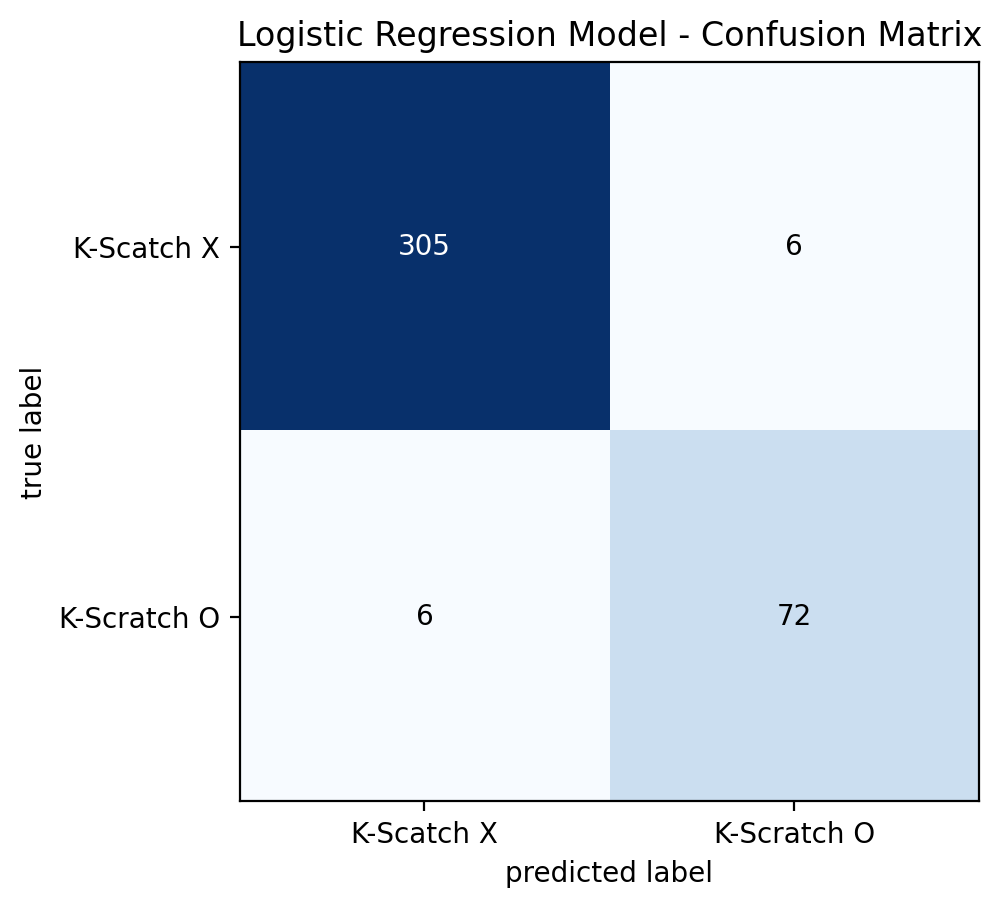

In [18]:
cm = confusion_matrix(y_test, GSLR_pred)
plt.figure(figsize=(5,5))
plot_confusion_matrix(cm, hide_ticks=True, cmap=plt.cm.Blues)
plt.title('Logistic Regression Model - Confusion Matrix')
plt.xticks(range(2), ["K-Scatch X", 'K-Scratch O'], fontsize=10)
plt.yticks(range(2), ["K-Scatch X", 'K-Scratch O'], fontsize=10)
plt.show()

In [19]:
# Cross validation 과정에서 계산된 정확도 값들을 출력
means = GSLR.cv_results_['mean_test_score']
stds = GSLR.cv_results_['std_test_score']
params = GSLR.cv_results_['params']
for mean, std, params in zip(means, stds, params):
    print("{0:.3f} (+/-{1:.03f}) for {2}".format(mean, std*2, params))

0.945 (+/-0.037) for {'C': 0.01, 'penalty': 'l1', 'tol': 0.0001}
0.946 (+/-0.040) for {'C': 0.01, 'penalty': 'l1', 'tol': 0.01}
0.798 (+/-0.005) for {'C': 0.01, 'penalty': 'l1', 'tol': 100.0}
0.950 (+/-0.033) for {'C': 0.01, 'penalty': 'l2', 'tol': 0.0001}
0.950 (+/-0.033) for {'C': 0.01, 'penalty': 'l2', 'tol': 0.01}
0.798 (+/-0.005) for {'C': 0.01, 'penalty': 'l2', 'tol': 100.0}
0.964 (+/-0.028) for {'C': 0.1, 'penalty': 'l1', 'tol': 0.0001}
0.964 (+/-0.028) for {'C': 0.1, 'penalty': 'l1', 'tol': 0.01}
0.798 (+/-0.005) for {'C': 0.1, 'penalty': 'l1', 'tol': 100.0}
0.966 (+/-0.021) for {'C': 0.1, 'penalty': 'l2', 'tol': 0.0001}
0.966 (+/-0.021) for {'C': 0.1, 'penalty': 'l2', 'tol': 0.01}
0.798 (+/-0.005) for {'C': 0.1, 'penalty': 'l2', 'tol': 100.0}
0.969 (+/-0.028) for {'C': 0.5, 'penalty': 'l1', 'tol': 0.0001}
0.970 (+/-0.028) for {'C': 0.5, 'penalty': 'l1', 'tol': 0.01}
0.798 (+/-0.005) for {'C': 0.5, 'penalty': 'l1', 'tol': 100.0}
0.969 (+/-0.023) for {'C': 0.5, 'penalty': 'l2', 

## Decision Tree
**Parameters**
- criterion: gini, enropy
- max_depth: 최대 깊이를 제한
- min_samples_split: 한 노드에 들어있는 최소 데이터 수 제한
- min_samples_leaf
- max_features: 변수의 개수를 제한

**Pruning**: Overfitting을 낮추기 위해 '가지치기'를 실행

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)
dt_clf_pred = dt_clf.predict(x_test)
dt_clf_acc = accuracy_score(y_test, dt_clf_pred)
print(classification_report(y_test, dt_clf_pred))
print(Fore.GREEN + f"Accuracy of Decision Tree is: {100*dt_clf_acc:2.2f}%")
dt_clf.get_params()

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       311
           1       0.94      0.95      0.94        78

    accuracy                           0.98       389
   macro avg       0.96      0.97      0.96       389
weighted avg       0.98      0.98      0.98       389

Accuracy of Decision Tree is: 97.69%


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [21]:
parameters = {'criterion':['gini', 'entropy'],
              'min_samples_split':[2, 5, 10, 15],
              'max_depth':[None, 2],
              'min_samples_leaf':[1, 3, 10, 15],
              'max_features':[None, 'sqrt', 'log2'],
             }

In [22]:
dt = DecisionTreeClassifier()
GSDT = GridSearchCV(dt, parameters, cv=10, n_jobs=n_thread, scoring='accuracy')
GSDT.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 10, 15],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [23]:
print("Final Params:", GSDT.best_params_)
print("Best Score:", GSDT.best_score_)

Final Params: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 10}
Best Score: 0.9787386269644335


In [24]:
GSDT_pred = GSDT.predict(x_test)
GSDT_acc = accuracy_score(y_test, GSDT_pred)
print(classification_report(y_test, GSDT_pred))
print(Fore.GREEN + f"Accuracy of GridSearch Decision Tree: {100*GSDT_acc:2.2f}%")

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       311
           1       0.95      0.91      0.93        78

    accuracy                           0.97       389
   macro avg       0.96      0.95      0.96       389
weighted avg       0.97      0.97      0.97       389

Accuracy of GridSearch Decision Tree: 97.17%


<Figure size 500x500 with 0 Axes>

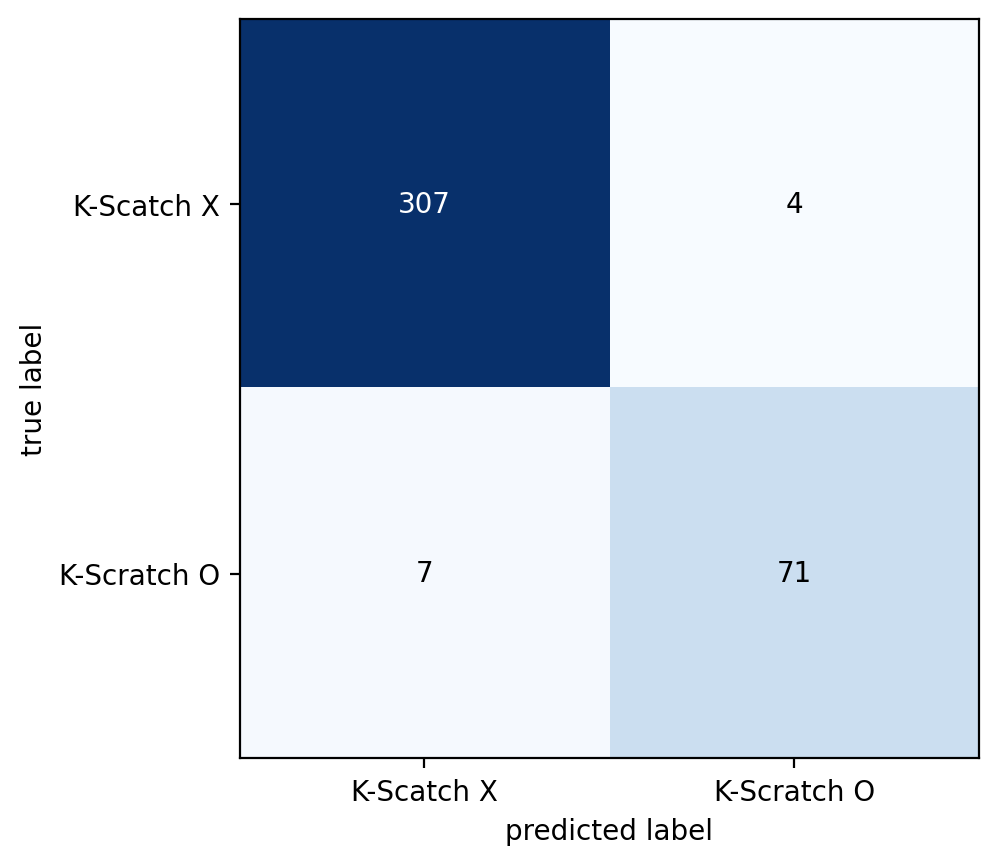

In [25]:
cm = confusion_matrix(y_test, GSDT_pred)
plt.figure(figsize=(5,5))
plot_confusion_matrix(cm, cmap=plt.cm.Blues, hide_ticks=True)
plt.xticks(range(2), ["K-Scatch X", 'K-Scratch O'], fontsize=10)
plt.yticks(range(2), ["K-Scatch X", 'K-Scratch O'], fontsize=10)
plt.show()

In [26]:
# train에서 종속변수의 분포
print(y_train.value_counts())

0    1239
1     313
Name: K_Scatch, dtype: int64


In [27]:
!dot -c

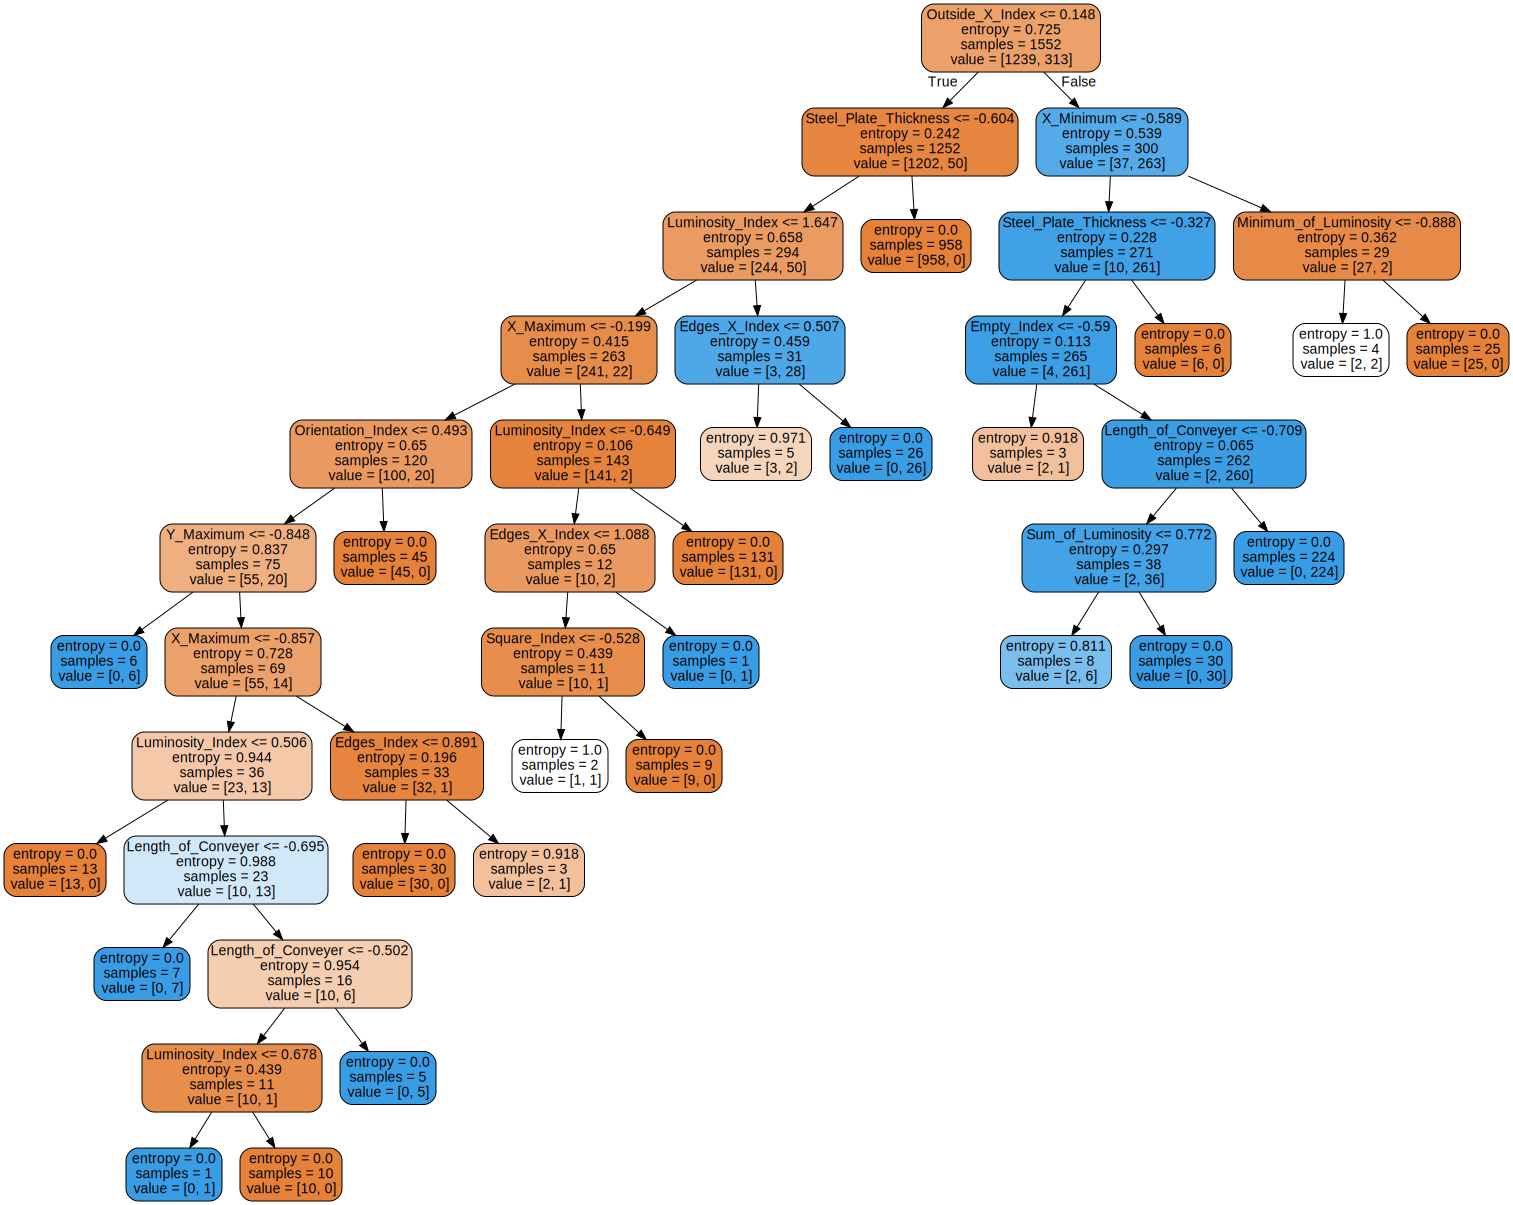

In [28]:
import graphviz
import sklearn.tree as tree
dt2 = DecisionTreeClassifier(criterion = 'entropy',
                           max_depth = None, # 몇 번의 Edge를 거치는가
                           max_features = None, # 사용하는 변수의 개수
                           min_samples_leaf = 1, # Leaf가 가질 수 있는 최소 샘플 수
                           min_samples_split = 10 # 다음 가지치기를 하기 위해 갖고있어야하는 최소 샘플 수
                          )
dt2.fit(x_train, y_train)
dot_data = tree.export_graphviz(dt2, feature_names=x_train.columns, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

## Random Forest
- Random Forest는 Bagging과 Drop-out을 활용하여 의사결정나무의 변동성을 완화시키고 예측력을 높인 모델
    - **Bagging**
        - Bootstrapping: 복원추출을 통하여 샘플 구성이 조금씩 다른 여러 데이터넷을 생성
        - Aggregating: 여러 모형의 결과를 통합하여 모형의 변동성(Variance)을 낮춤
    - **Drop-out: Tree를 구성할 때 변수를 일부 탈락. Tree간의 Correlation을 감소시켜 모형의 변동성을 낮춤**
    
**Parameters**
- n_estimators: Bootstrapping을 몇 회 반복할지
- max_depth
- min_sample_split
- min_sample_leaf

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)
rf_clf_pred = rf_clf.predict(x_test)
rf_clf_acc = accuracy_score(y_test, rf_clf_pred)
print(classification_report(y_test, rf_clf_pred))
print(Fore.GREEN + f"Accuracy of Random Forest: {100*rf_clf_acc:2.2f}%")

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       311
           1       1.00      0.95      0.97        78

    accuracy                           0.99       389
   macro avg       0.99      0.97      0.98       389
weighted avg       0.99      0.99      0.99       389

Accuracy of Random Forest: 98.97%


In [30]:
rf=RandomForestClassifier()
parameters = {'n_estimators':[50,100],
              'criterion':['entropy'],
              'min_samples_split':[2, 5],
              'max_depth':[None, 2],
              'min_samples_leaf':[1, 3, 10],
              'max_features':['sqrt'],
             }
GSRF=GridSearchCV(rf, parameters, cv=10, n_jobs=n_thread, scoring='accuracy')
GSRF.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'criterion': ['entropy'], 'max_depth': [None, 2],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [31]:
print('final params', GSRF.best_params_)
print('best score', GSRF.best_score_)

final params {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
best score 0.9845285359801489


In [32]:
GSRF_pred = GSRF.predict(x_test)
GSRF_acc = accuracy_score(y_test, GSRF_pred)
print(classification_report(y_test, GSRF_pred))
print(Fore.GREEN + f"Accuracy of GS_RandomForest: {100*GSRF_acc:2.2f}%")

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       311
           1       1.00      0.94      0.97        78

    accuracy                           0.99       389
   macro avg       0.99      0.97      0.98       389
weighted avg       0.99      0.99      0.99       389

Accuracy of GS_RandomForest: 98.71%


<Figure size 500x500 with 0 Axes>

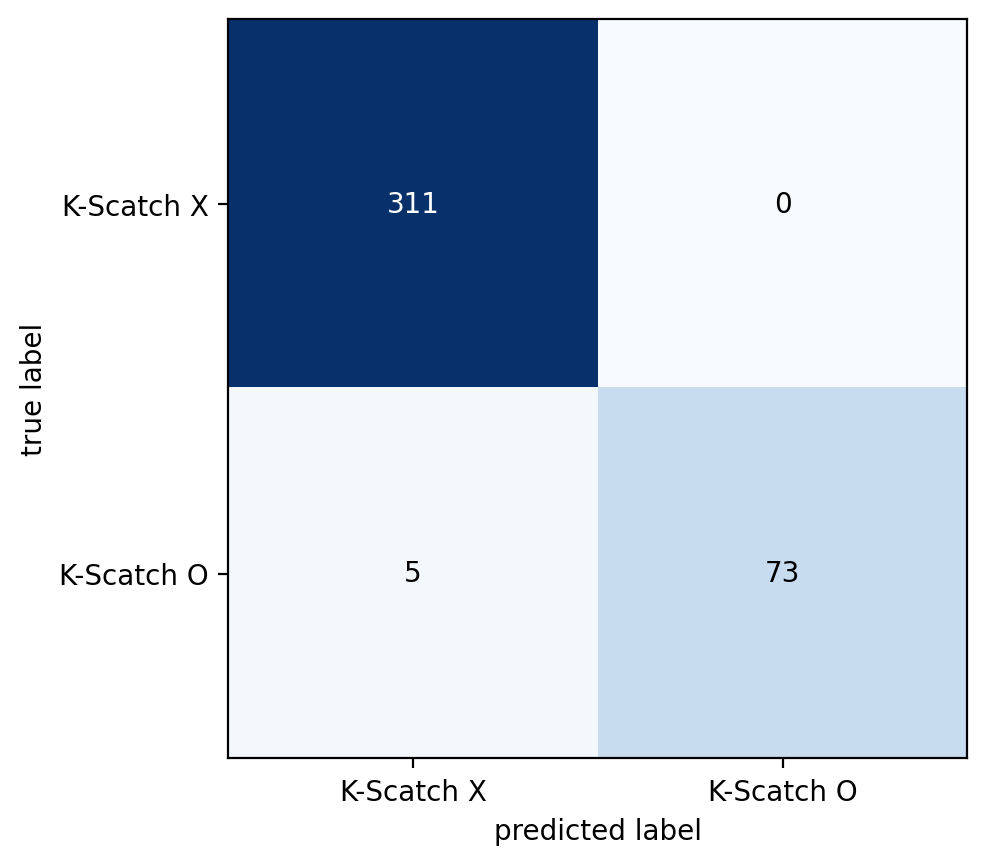

In [33]:
cm = confusion_matrix(y_test, GSRF_pred)
plt.figure(figsize=(5,5))
plot_confusion_matrix(cm, cmap=plt.cm.Blues, hide_ticks=True)
plt.xticks(range(2), ['K-Scatch X', 'K-Scatch O'])
plt.yticks(range(2), ['K-Scatch X', 'K-Scatch O'])
plt.show()

## Support Vector Machine
- Margin을 최대로하는 Boundary를 찾는 것이 목표
- Error를 허용하는 정도를 Parameter'C'로 표현
    - C가 크면 Error를 많이 허용. C가 작을수록 Error를 적게 허용
    
**Parameters**
- C: 값이 크면 Regularization을 완화. 작으면 세게
- kernel: Linear한 경우 일반적으로 사용을 안함. 곡선 등 비선형관계는 Polynomial, Gaussian 등을 사용
- degree: Polynomial의 차원(2차, 3차, ...)
- gamma: 'rbf', 'poly', and 'sigmoid'에 사용

**선형관계** -> C를 조절  
**비선형관계** -> kernel, degree, gamma를 조절

In [34]:
from sklearn.svm import SVC

sc_clf = SVC()
sc_clf.fit(x_train, y_train)
sc_clf_pred = sc_clf.predict(x_test)
sc_clf_acc = accuracy_score(y_test, sc_clf_pred)
print(classification_report(y_test, sc_clf_pred))
print(Fore.GREEN + f"Accuracy of Support Vector Classifier: {100*sc_clf_acc:2.2f}%")

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       311
           1       0.99      0.92      0.95        78

    accuracy                           0.98       389
   macro avg       0.98      0.96      0.97       389
weighted avg       0.98      0.98      0.98       389

Accuracy of Support Vector Classifier: 98.20%


In [35]:
parameters = {'C':[0.01, 0.1, 0.5, 0.9, 1, 5, 10], 'kernel':['linear', 'rbf', 'poly'], 'gamma':[0.1, 1, 10]}

svc=SVC()
GS_SVM = GridSearchCV(svc, parameters, cv=10, n_jobs=n_thread, scoring='accuracy')
GS_SVM.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=8,
             param_grid={'C': [0.01, 0.1, 0.5, 0.9, 1, 5, 10],
                         'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [36]:
print('final params', GS_SVM.best_params_)
print('best score', GS_SVM.best_score_)

final params {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
best score 0.9838999172870141


In [37]:
GS_SVM_pred = GS_SVM.predict(x_test)
GS_SVM_acc = accuracy_score(y_test, GS_SVM_pred)
print(classification_report(y_test, GS_SVM_pred))
print(Fore.GREEN + f"Accuracy of GS Support Vector Classifier: {100*GS_SVM_acc:2.2f}%")

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       311
           1       0.99      0.91      0.95        78

    accuracy                           0.98       389
   macro avg       0.98      0.95      0.97       389
weighted avg       0.98      0.98      0.98       389

Accuracy of GS Support Vector Classifier: 97.94%


<Figure size 500x500 with 0 Axes>

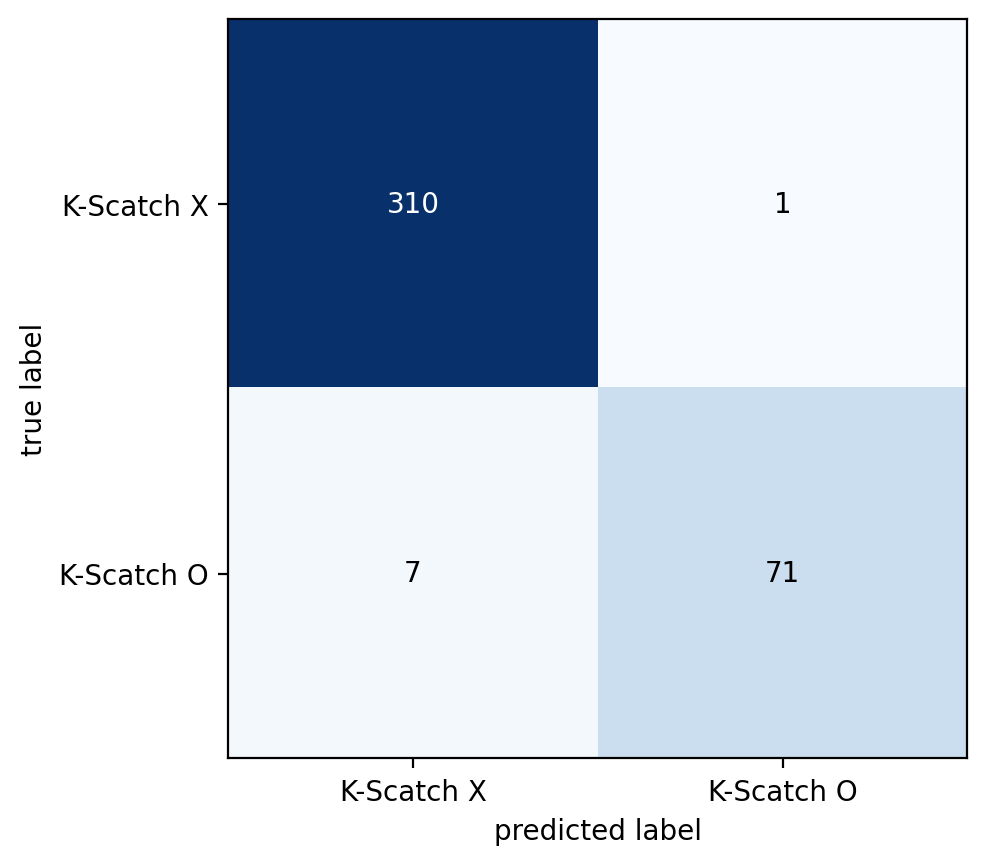

In [38]:
cm=confusion_matrix(y_test, GS_SVM_pred)

plt.figure(figsize=(5,5))
plot_confusion_matrix(cm, hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2), ['K-Scatch X', 'K-Scatch O'])
plt.yticks(range(2), ['K-Scatch X', 'K-Scatch O'])
plt.show()

## ANN
**Parameters**
- hidden_layer_size: tuple, **default=(100,)**
    - Ex) (3,2)-> 1번째 hidden layer 3 & 2번째 hidden layer 2
- activation: 'identity', 'logistic', 'tanh', **'relu'**
- solver: 'lbfgs', 'sgd', **'adam'**
    - 'lbfgs'는 샘플이 크지않을 때 adam보다 효과가 좋음
- alpha
- beta_1, beta_2
    - 'adam'을 썼을 때 수렴이 잘 안되면 사용
    
**Tips**
- 일반적으로 hidden layer는 하나로 충분(데이터가 매우 크지 않을 때)
- hidden layer가 2개를 넘어서면 자칫 local minimum에 빠지는 경우가 발생
- hiden node는 Grid Search로 찾는 것이 일반적
    - $\text{Number of Neurons} = \cfrac{\text{Training Data Samples}}{\text{Factor}\times\text{(Input Neurons}+\text{Output Neurons)}}$
    - **The factor is used to prevent over-fitting and it is number between 1-10**

In [39]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(max_iter=1000)
nn_model.fit(x_train, y_train)
nn_model_pred = nn_model.predict(x_test)
nn_model_acc = accuracy_score(y_test, nn_model_pred)
print(classification_report(y_test, nn_model_pred))
print(Fore.GREEN + f"Accuracy of Neural Network is: {100*nn_model_acc:2.2f}%")

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       311
           1       0.97      0.94      0.95        78

    accuracy                           0.98       389
   macro avg       0.98      0.96      0.97       389
weighted avg       0.98      0.98      0.98       389

Accuracy of Neural Network is: 98.20%


In [40]:
x_train.shape

(1552, 27)

In [41]:
1552/(1*(26+1))

57.48148148148148

In [42]:
1552/(10*(26+1))

5.7481481481481485

In [73]:
nn_model2 = MLPClassifier(random_state=13725, max_iter=1000)

In [74]:
parameters = {'alpha':[1e-3, 1e-1, 1e1],
              'hidden_layer_sizes':[(5), (30), (60)],
              'activation':['tanh', 'relu'],
              'solver':['adam', 'lbfgs']
             }
GS_NN=GridSearchCV(nn_model2, parameters, cv=10, n_jobs=n_thread, scoring='accuracy')
GS_NN.fit(x_train, y_train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=1000, random_state=13725),
             n_jobs=8,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.001, 0.1, 10.0],
                         'hidden_layer_sizes': [5, 30, 60],
                         'solver': ['adam', 'lbfgs']},
             scoring='accuracy')

In [75]:
print('final params', GS_NN.best_params_)
print('best score', GS_NN.best_score_)

final params {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 60, 'solver': 'adam'}
best score 0.979387923904053


In [76]:
means = GS_NN.cv_results_['mean_test_score']
stds = GS_NN.cv_results_['std_test_score']
params = GS_NN.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("{0:.3f} (+/-{1:.03f}) for {2}".format(mean, std, param))

0.969 (+/-0.016) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 5, 'solver': 'adam'}
0.972 (+/-0.016) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 5, 'solver': 'lbfgs'}
0.976 (+/-0.014) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 30, 'solver': 'adam'}
0.975 (+/-0.013) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 30, 'solver': 'lbfgs'}
0.978 (+/-0.014) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 60, 'solver': 'adam'}
0.976 (+/-0.011) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 60, 'solver': 'lbfgs'}
0.967 (+/-0.016) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 5, 'solver': 'adam'}
0.976 (+/-0.013) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 5, 'solver': 'lbfgs'}
0.978 (+/-0.011) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 30, 'solver': 'adam'}
0.976 (+/-0.013) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_laye

1. 모든 구간에서는 아니지만, 대부분 동일한 Hyper Parameters가 주워질 때 Adam이 lbfgs보다 낮은 정확도를 가짐 (alpha가 클 때)  
    $\rightarrow$**adam보다는 lbfgs에서 더 Robust한 결과가 나옴**
2. 뚜렷하게 나타나지는 않지만, hidden_layer_sizes가 5보다는 30,60에서 더 높은 정확도를 가짐
3. alpha는 10보다는 0.1, 0.001이 더 좋은 결과를 가짐  
    $\rightarrow$**0.1과 0.001은 큰 차이가 없음**
4. tanh와 relu의 차이는 크지않음
5. 대부분의 정확도들이 오차범위 안에 위치
    $\rightarrow$**cross-validation 10번은 충분하지 않음**
    $\rightarrow$**그렇다고 늘리면 오차범위가 더 커질것**
- Sample Size: 1500개
- Defect Sample Size: 300
- Validation Set: (1500, 300) x 1/10 = (150, 30) -> Accuracy 계산
    - 150개 30개로 Accuracy를 계산하게되는데 Sample이 더 줄어든다면(cv가 커진다면) Accuracy 계산 하나하나의 값들이 흔들리므로 이 값들도 많이 흔들려서 오히려 Cross Validation을 많이해서 많이 계산했음에도 오차범위가 늘어나게됨
    - Cross Validation을 줄여도 계산 자체가 줄어들어 오차범위가 늘어나게됨

따라서 현재로서는 오차범위 밖을 벗어나는 Hyper Parameters Set을 확인후 제거 (EX, 'adam')  
만약, Convergence Problem이 있다면 다시 adam을 적용  
나머지는 되도록이면 best score의 best parameter로 적용

In [77]:
parameters2 = {'alpha':[1e-1],
               'hidden_layer_sizes':[(5), (10), (20), (30)], # 큰 차이가 없다면 일반적으로 과적합은 피해야하므로 (60,)을 제거
               'activation':['tanh'],
               'solver':['lbfgs']
              }
GS_NN2=GridSearchCV(nn_model2, parameters2, cv=10, n_jobs=n_thread, scoring='accuracy')
GS_NN2.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=1000, random_state=13725),
             n_jobs=8,
             param_grid={'activation': ['tanh'], 'alpha': [0.1],
                         'hidden_layer_sizes': [5, 10, 20, 30],
                         'solver': ['lbfgs']},
             scoring='accuracy')

In [78]:
means = GS_NN2.cv_results_['mean_test_score']
stds = GS_NN2.cv_results_['std_test_score']
params = GS_NN2.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("{0:.3f} (+/-{1:.03f}) for {2}".format(mean, std, param))

0.976 (+/-0.013) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 5, 'solver': 'lbfgs'}
0.974 (+/-0.014) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 10, 'solver': 'lbfgs'}
0.980 (+/-0.015) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 20, 'solver': 'lbfgs'}
0.976 (+/-0.013) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 30, 'solver': 'lbfgs'}


$\begin{aligned}
\rightarrow &\text{'hidden_layer_size'를 20으로 선정 후 hidden_layer 층을 하나 더 쌓음}\\
&\text{층을 하나 더 쌓았을 때 문제점은 Convergence하지 않을 수 있다는 것}\\
&\textbf{모델이 복잡해지는만큼 Samples수가 충분하지 않다면 수렴하지 않을 가능성이 높음}
\end{aligned}$

In [79]:
parameters3 = {'alpha':[1e-1],
               'hidden_layer_sizes':[(20, 2), (20, 5)], # 큰 차이가 없다면 일반적으로 과적합은 피해야하므로 (60,)을 제거
               'activation':['tanh'],
               'solver':['lbfgs', 'adam']
              }
GS_NN3=GridSearchCV(nn_model2, parameters3, cv=10, n_jobs=n_thread, scoring='accuracy')
GS_NN3.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=1000, random_state=13725),
             n_jobs=8,
             param_grid={'activation': ['tanh'], 'alpha': [0.1],
                         'hidden_layer_sizes': [(20, 2), (20, 5)],
                         'solver': ['lbfgs', 'adam']},
             scoring='accuracy')

In [80]:
means = GS_NN3.cv_results_['mean_test_score']
stds = GS_NN3.cv_results_['std_test_score']
params = GS_NN3.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("{0:.3f} (+/-{1:.03f}) for {2}".format(mean, std, param))

0.973 (+/-0.011) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (20, 2), 'solver': 'lbfgs'}
0.977 (+/-0.013) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (20, 2), 'solver': 'adam'}
0.974 (+/-0.012) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (20, 5), 'solver': 'lbfgs'}
0.977 (+/-0.016) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (20, 5), 'solver': 'adam'}


In [82]:
GS_NN_pred = GS_NN2.predict(x_test)
GS_NN_acc = accuracy_score(y_test, GS_NN_pred)
print(classification_report(y_test, GS_NN_pred))
print(Fore.GREEN + f"Accuracy of GS Neural Network is: {100*GS_NN_acc:2.2f}%")

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       311
           1       0.96      0.96      0.96        78

    accuracy                           0.98       389
   macro avg       0.98      0.98      0.98       389
weighted avg       0.98      0.98      0.98       389

Accuracy of GS Neural Network is: 98.46%


<Figure size 500x500 with 0 Axes>

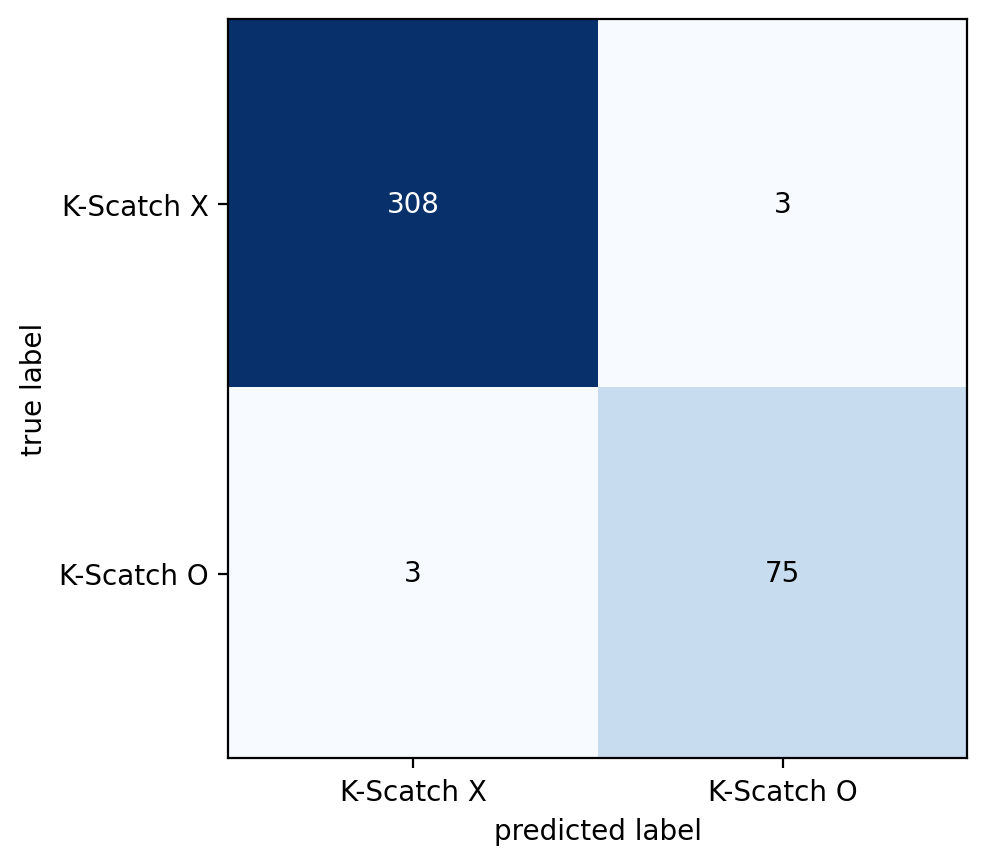

In [83]:
cm = confusion_matrix(y_test, GS_NN_pred)
plt.figure(figsize=(5,5))
plot_confusion_matrix(cm, cmap=plt.cm.Blues, hide_ticks=True)
plt.xticks(range(2),['K-Scatch X', 'K-Scatch O'])
plt.yticks(range(2),['K-Scatch X', 'K-Scatch O'])
plt.show()

[Intuitive Comprehension](https://playground.tensorflow.org)

### Boosting
**Parameters**
- Directly control model complexity
    - max_depth
    - min_child_weight
    - gamma
- To add randomness to make training robust to noise
    - subsample
    - colsample_bytree
    - eta : stepsize
    - num_round

In [85]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective='binary:logistic')

In [ ]:
parameters = {
    'max_depth':[5, 8],
    'min_child_weight':[1, 5],
    'gamma':[0, 1],
    'colsample_bytree':
    
}  